CONTENTS LIST:
- Additional consistency checks to ensure report is filled out correctly
- Creating additional visualizations for the report

01 Importing libraries and data

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import os

In [4]:
#importing data
path = '/Users/gingermoore/Documents/04-2025 Instacart Basket Analysis'
df_ords = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'orders_checked.csv'))

02 Additional checks

In [5]:
df_ords.head()

,Unnamed: 0.1,Unnamed: 0,order_id,user_id,orders_chronological,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_new
0,0,0,2539329,1,1,2,8,NaN,True
1,1,1,2398795,1,2,3,7,15.0,False
2,2,2,473747,1,3,3,12,21.0,False
3,3,3,2254736,1,4,4,7,29.0,False
4,4,4,431534,1,5,4,15,28.0,False


In [6]:
df_ords.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'order_id', 'user_id',
       'orders_chronological', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'is_new'],
      dtype='object')

In [7]:
ords = df_ords.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'])

In [8]:
ords.head()

,order_id,user_id,orders_chronological,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_new
0,2539329,1,1,2,8,NaN,True
1,2398795,1,2,3,7,15.0,False
2,473747,1,3,3,12,21.0,False
3,2254736,1,4,4,7,29.0,False
4,431534,1,5,4,15,28.0,False


In [9]:
ords.shape

(3421083, 7)

In [10]:
#importing prods data to check the number of observations
prods = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'products_clean.csv'))

In [11]:
prods.head()

,Unnamed: 0.1,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices
0,0,0,1,Chocolate Sandwich Cookies,61,19,5.8
1,1,1,2,All-Seasons Salt,104,13,9.3
2,2,2,3,Robust Golden Unsweetened Oolong Tea,94,7,4.5
3,3,3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,10.5
4,4,4,5,Green Chile Anytime Sauce,5,13,4.3


In [12]:
df_prods = prods.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'])

In [13]:
df_prods.head()

,product_id,product_name,aisle_id,department_id,prices
0,1,Chocolate Sandwich Cookies,61,19,5.8
1,2,All-Seasons Salt,104,13,9.3
2,3,Robust Golden Unsweetened Oolong Tea,94,7,4.5
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,10.5
4,5,Green Chile Anytime Sauce,5,13,4.3


In [14]:
df_prods.shape

(49670, 5)

In [15]:
df_ords_prior = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'orders_products_prior.csv'))

In [16]:
df_ords_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [17]:
df_ords_prior.shape

(32434489, 4)

In [18]:
df_dups = df_ords_prior[df_ords_prior.duplicated()]

In [19]:
df_dups.value_counts()

Series([], Name: count, dtype: int64)

In [20]:
df_dups.shape

(0, 4)

In [23]:
#importing addtl data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_dataset.pkl'))

In [25]:
df.shape

(30959687, 33)

In [31]:
df.columns

Index(['user_id', 'Gender', 'State', 'Age', 'date_joined', 'dependents',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'orders_chronological',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'is_new', 'add_to_cart_order', 'reordered', 'price_range',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_order_total', 'spending_flag', 'median_days', 'frequency_flag',
       'region', 'exclude', 'customer_profile'],
      dtype='object')

In [33]:
df['price_range'].value_counts()

price_range
Mid-range product    20891771
Low-range product     9674840
High range             393076
Name: count, dtype: int64

03 Creating additional visualizations

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

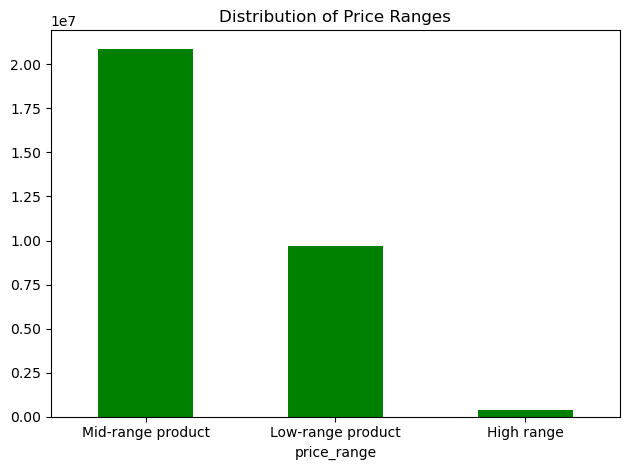

In [67]:
price_categories = df['price_range'].value_counts().plot.bar(color = 'green')
price_categories.tick_params('x', rotation=0)
plt.title('Distribution of Price Ranges')
plt.tight_layout()
plt.show()

In [69]:
price_categories.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_bar.png'))

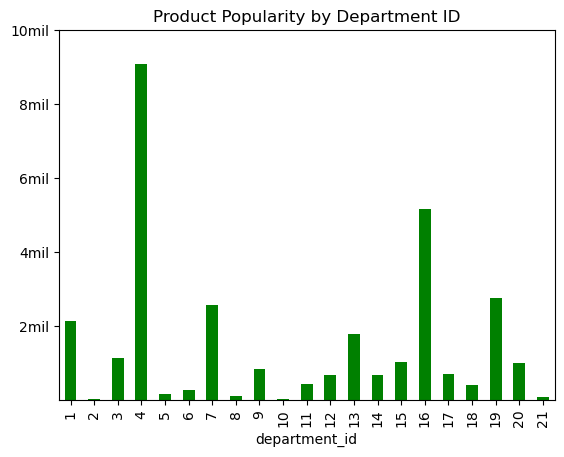

In [93]:
dept = df['department_id'].value_counts().sort_index().plot.bar(color = 'green')
plt.yticks([2000000, 4000000, 6000000, 8000000, 10000000], ['2mil', '4mil', '6mil', '8mil', '10mil'])
plt.title('Product Popularity by Department ID');

In [87]:
df['department_id'].value_counts()

department_id
4     9079273
16    5172305
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: count, dtype: int64

In [95]:
dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_popularity.png'))

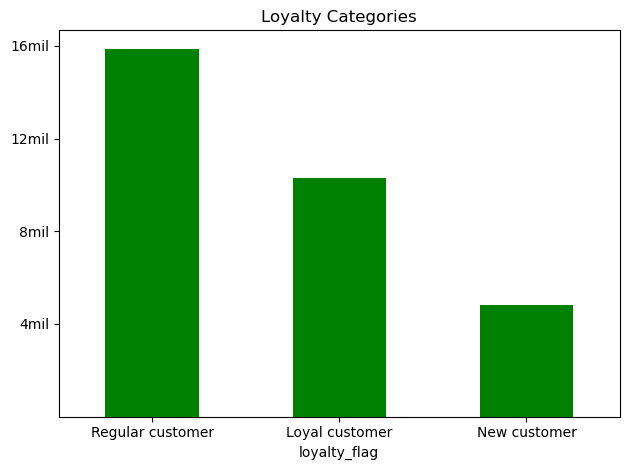

In [103]:
loyal = df['loyalty_flag'].value_counts().plot.bar(color = 'green')
loyal.tick_params('x', rotation=0)
plt.yticks([4000000, 8000000, 12000000, 16000000], ['4mil', '8mil', '12mil', '16mil'])
plt.title('Loyalty Categories')
plt.tight_layout()

In [105]:
loyal.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_bar.png'))

Text(0.5, 1.0, 'Customer Profiles')

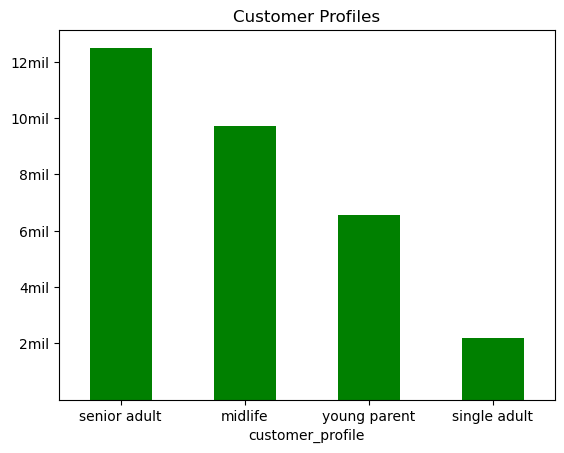

In [113]:
profiles = df['customer_profile'].value_counts().plot.bar(color = 'green')
plt.yticks([2000000, 4000000, 6000000, 8000000, 10000000, 12000000], ['2mil', '4mil', '6mil', '8mil', '10mil', '12mil'])
profiles.tick_params('x', rotation=0)
plt.title('Customer Profiles')

In [115]:
profiles.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profiles_bar.png'))